# School Dropout

# Limpieza, organizacion y estandarizacion de los datos

In [6]:
# Implementación de las librerias utilizadas.
from IPython.display import display # Para mostrar múltiples resultados en una sola celda.
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


In [4]:

# Subir el archivo CSV
from google.colab import files
files.upload()

Saving student_data (1).csv to student_data (1).csv


{'student_data (1).csv': b"Marital status;Application mode;Application order;Course;evening attendance;Previous qualification;Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Output\r\n1;8;5;2;1;1;1;13;10;6;10;1;0;0;1;1;0;20;0;0;0;0;0;0.0;0;0;0;0;0;0.0;0;10.8;1.4;1.74;Dropout\r\n1;6;1;11;1;1;1;1;3;4;4;1;0;0;0;1;0;19;0;0;6;6;6;14.0;0;

In [7]:
# Declaracion de variables generales.
df = pd.DataFrame()
df_current = pd.DataFrame()

In [9]:
 # Cargamos el archivo, para su principal lectura y procesamiento de datos.
try:
  df=pd.read_csv('student_data (1).csv',sep=';')
  display(df)
except Exception as e:
  print("Algo ocurrio con la lectura del archivo verifica la ruta")
  print(f'Error: {e}')
else:
  print("Lectura finalizada")


,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Lectura finalizada


In [10]:
# Obtenemos un panorama general de los datos.
def info_general_df(df):
  print('Información general del DataFrame')
  print(f'Cantidad de filas y columnas: {df.shape}')
  print("-"*50)
  print(f'Cantidad de datos nulos por columna: \n{df.isnull().sum()}')
  print("-"*50)
  print(f'Cantidad de datos únicos por columna: \n{df.nunique()}')
  print("-"*50)
  print(f'Tipos de datos por columna: \n{df.dtypes}')

info_general_df(df)

Información general del DataFrame
Cantidad de filas y columnas: (4424, 35)
--------------------------------------------------
Cantidad de datos nulos por columna: 
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
evening attendance                                0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scho

In [12]:
# Eliminacion de las columnas
df = pd.read_csv('student_data (1).csv', sep=';')
df= df.drop(['Application mode', 'Application order','Previous qualification',
               'Previous qualification', 'Mother\'s occupation','Father\'s occupation',
             'Age at enrollment','Curricular units 1st sem (credited)',
             'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
             'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)',
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
             'Curricular units 2nd sem (without evaluations)', 'Inflation rate', 'GDP' ]
             , axis=1)

In [13]:
# Renombre de las columnas
df.rename (columns= {
        'Marital status':'Estado_civil',
        'Course':'Curso',
        'evening attendance':'Modalidad_asistencia',
        'Nacionality':'Nacionalidad',
        'Mother\'s qualification':'Cualificación_de_la_madre',
        'Father\'s qualification':'Cualificación_del_padre',
        'Displaced':'Desplazado',
        'Educational special needs':'Necesidades_educativas_especiales',
        'Debtor':'Deudor',
        'Tuition fees up to date':'Matrícula_al_día',
        'Gender':'Género',
        'Scholarship holder':'Titular_de_la_beca',
        'International':'Estudiante_internacional',
        'Curricular units 1st sem (grade)':'Nota_primer_semestre',
        'Curricular units 2nd sem (grade)':'Nota_segundo_semestre',
        'Unemployment rate':'Tasa_de_desempleo',
        'Output': 'Rendimiento',
        }, inplace=True)

In [14]:
# Diccionario
mapping = {
    'Estado_civil': {1: 'Soltero/a',        2: 'Casado/a',    3: 'viudo/a',    4: 'divorciado/a',
                     5: 'unión de hecho/a', 6: 'separado legalmente/a'},

    'Curso': {1: 'Tecnologías de Producción de Biocombustibles',
            2: 'Diseño de Animación y Multimedia',
            3: 'Servicio Social (presencialidad vespertina)',
            4: 'Agronomía',
            5: 'Diseño de Comunicación',
            6: 'Enfermería Veterinaria',
            7: 'Ingeniería Informática ',
            8: 'Equinocultura',
            9: 'Gerencia ',
            10:'Servicio Social',
            11:'Turismo ',
            12: 'Enfermería',
            13: 'Higiene Bucal',
            14: 'Gerencia de Publicidad y Mercadeo',
            15: 'Periodismo y Comunicación',
            16:'Educación Básica',
            17:'Gerencia (presencialidad vespertina)'},

    'Modalidad_asistencia': {1: 'Matutino', 2: 'vespertino'},

    'Nacionalidad': {1: 'Portugués',   2: 'Alemán', 3: 'Español',
            4: 'Italiano',      5: 'Holandés',      6: 'Inglés',     7: 'Lituano',
            8: 'Angoleño',      9:'Caboverdiano',   10:'Guineano',   11: 'Mozambiqueño',
            12: 'Santo Tomé y Príncipe',            13: 'Turco',     14: 'Brasileño',
            15:'Rumano',        16:'Moldavia (República de)',        17: 'Mexicano',
            18: 'Ucraniano',    19: 'Ruso',         20: 'Cubano',    21: 'Colombiano'},


    'Cualificación_de_la_madre': {1: 'Educación Secundaria - 12º Año de Escolaridad o Equiv.',
            2: 'Educación Superior - Licenciatura ',
            3: 'Educación Superior - Grado',
            4: 'Educación Superior - Maestría ',
            5: 'Educación Superior - Doctorado',
            6: 'Frecuencia de Educación Superior',
            7: '12º Año de Escolaridad - No Concluido',
            8: '11º Año de Escolaridad - No Concluido',
            9: '7º Año (Antiguo)',
            10:'Otro - 11º Año de Escolaridad',
            11: '10º Año de Escolaridad',
            12: 'Curso de comercio general',
            13: 'Educación Básica 3er Ciclo (9º/10º/11º Año) o Equiv.',
            14: 'Carrera técnico-profesional',
            15:'7º año de escolaridad',
            16:'2º ciclo del bachillerato general',
            17: '9º año de escolaridad - No concluido ',
            18: '8º año de escolaridad',
            19: 'Desconocido',
            20: 'No sabe leer ni escribir',
            21: 'Puede leer sin haber cursado 4º año de escolaridad',
            22: 'Educación básica 1er ciclo (4º/5º año) o equivalente',
            23: 'Educación básica 2º ciclo (6º/7º/8º año) o equivalente',
            24: 'Carrera de especialización tecnológica',
            25: 'Carrera de grado superior (1er ciclo)',
            26: 'Carrera de grado superior especializada',
            27: 'Carrera técnico superior profesional',
            28: 'Carrera de grado superior - Maestría (2º ciclo)',
            29: 'Carrera de grado superior - Doctorado (3er ciclo)'},


    'Cualificación_del_padre': {1: 'Educación Secundaria - 12º Año de Escolaridad o Equiv.',
            2: 'Educación Superior - Licenciatura ',
            3: 'Educación Superior - Grado',
            4: 'Educación Superior - Maestría ',
            5: 'Educación Superior - Doctorado',
            6: 'Frecuencia de Educación Superior',
            7: '12º Año de Escolaridad - No Concluido',
            8: '11º Año de Escolaridad - No Concluido',
            9: '7º Año (Antiguo)',
            10:'Otro - 11º Año de Escolaridad',
            11: '10º Año de Escolaridad',
            12: 'Curso de comercio general',
            13: 'Educación Básica 3er Ciclo (9º/10º/11º Año) o Equiv.',
            14: 'Carrera técnico-profesional',
            15:'7º año de escolaridad',
            16:'2º ciclo del bachillerato general',
            17: '9º año de escolaridad - No concluido ',
            18: '8º año de escolaridad',
            19: 'Desconocido',
            20: 'No sabe leer ni escribir',
            21: 'Puede leer sin haber cursado 4º año de escolaridad',
            22: 'Educación básica 1er ciclo (4º/5º año) o equivalente',
            23: 'Educación básica 2º ciclo (6º/7º/8º año) o equivalente',
            24: 'Carrera de especialización tecnológica',
            25: 'Carrera de grado superior (1er ciclo)',
            26: 'Carrera de grado superior especializada',
            27: 'Carrera técnico superior profesional',
            28: 'Carrera de grado superior - Maestría (2º ciclo)',
            29: 'Carrera de grado superior - Doctorado (3er ciclo)'},


    'Desplazado': {0: 'No', 1: 'Si'},

    'Necesidades_educativas_especiales': {0: 'No', 1: 'Si'},

    'Deudor': {0: 'No', 1: 'Si'},

    'Matrícula_al_día': {0: 'No', 1: 'Si'},

    'Género': {0: 'Femenino', 1: 'Masculino'},

    'Titular_de_la_beca': {0: 'No', 1: 'Si'},

    'Estudiante_internacional': {0: 'No', 1: 'Si'},
}

In [15]:
# Aplicacion del mapeo a  las múltiples columnas
df = df.replace(mapping)

In [16]:
# Guardar los cambios en un nuevo csv
df.to_csv("Final.csv", index=False)

In [17]:
try:
  df=pd.read_csv('Final.csv')
  display(df)
except Exception as e:
  print("Algo ocurrio con la lectura del archivo verifica la ruta")
  print(f'Error: {e}')
else:
  print("Lectura finalizada")

,Estado_civil,Curso,Modalidad_asistencia,Nacionalidad,Cualificación_de_la_madre,Cualificación_del_padre,Desplazado,Necesidades_educativas_especiales,Deudor,Matrícula_al_día,Género,Titular_de_la_beca,Estudiante_internacional,Nota_primer_semestre,Nota_segundo_semestre,Tasa_de_desempleo,Rendimiento
0,Soltero/a,Diseño de Animación y Multimedia,Matutino,Portugués,Educación Básica 3er Ciclo (9º/10º/11º Año) o ...,Otro - 11º Año de Escolaridad,Si,No,No,Si,Masculino,No,No,0.000000,0.000000,10.8,Dropout
1,Soltero/a,Turismo,Matutino,Portugués,Educación Secundaria - 12º Año de Escolaridad ...,Educación Superior - Grado,Si,No,No,No,Masculino,No,No,14.000000,13.666667,13.9,Graduate
2,Soltero/a,Diseño de Comunicación,Matutino,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera técnico superior profesional,Si,No,No,No,Masculino,No,No,0.000000,0.000000,10.8,Dropout
3,Soltero/a,Periodismo y Comunicación,Matutino,Portugués,Educación básica 2º ciclo (6º/7º/8º año) o equ...,Carrera técnico superior profesional,Si,No,No,Si,Femenino,No,No,13.428571,12.400000,9.4,Graduate
4,Casado/a,Servicio Social (presencialidad vespertina),0,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera de grado superior - Maestría (2º ciclo),No,No,No,Si,Femenino,No,No,12.333333,13.000000,13.9,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Soltero/a,Periodismo y Comunicación,Matutino,Portugués,Educación Secundaria - 12º Año de Escolaridad ...,Educación Secundaria - 12º Año de Escolaridad ...,No,No,No,Si,Masculino,No,No,13.600000,12.666667,15.5,Graduate
4420,Soltero/a,Periodismo y Comunicación,Matutino,Ruso,Educación Secundaria - 12º Año de Escolaridad ...,Educación Secundaria - 12º Año de Escolaridad ...,Si,No,Si,No,Femenino,No,Si,12.000000,11.000000,11.1,Dropout
4421,Soltero/a,Enfermería,Matutino,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera técnico superior profesional,Si,No,No,Si,Femenino,Si,No,14.912500,13.500000,13.9,Dropout
4422,Soltero/a,Gerencia,Matutino,Portugués,Educación básica 1er ciclo (4º/5º año) o equiv...,Carrera técnico superior profesional,Si,No,No,Si,Femenino,Si,No,13.800000,12.000000,9.4,Graduate


Lectura finalizada


# Calcular metricas y rangos de datos

In [18]:
# Pregunta 1 ¿Existen diferencias en la tasa de deserción entre las distintas carreras?
# Cargar el archivo
df = pd.read_csv('Final.csv')

# Filtra los alumnos que han abandonado
dropouts = df[df['Rendimiento'] == 'Dropout']

# Cuenta los alumnos que abandonaron por carrera
abandonos_por_carrera = dropouts['Curso'].value_counts()

# Muestra los resultados con el nombre de la carrera y el numero de abandonos
for carrera, abandonos in abandonos_por_carrera.items():
    print(f"Carrera: {carrera} - Alumnos que abandonaron: {abandonos}")


Carrera: Gerencia (presencialidad vespertina) - Alumnos que abandonaron: 136
Carrera: Gerencia  - Alumnos que abandonaron: 134
Carrera: Enfermería - Alumnos que abandonaron: 118
Carrera: Periodismo y Comunicación - Alumnos que abandonaron: 101
Carrera: Turismo  - Alumnos que abandonaron: 96
Carrera: Gerencia de Publicidad y Mercadeo - Alumnos que abandonaron: 95
Carrera: Ingeniería Informática  - Alumnos que abandonaron: 92
Carrera: Enfermería Veterinaria - Alumnos que abandonaron: 90
Carrera: Agronomía - Alumnos que abandonaron: 86
Carrera: Educación Básica - Alumnos que abandonaron: 85
Carrera: Diseño de Animación y Multimedia - Alumnos que abandonaron: 82
Carrera: Equinocultura - Alumnos que abandonaron: 78
Carrera: Servicio Social (presencialidad vespertina) - Alumnos que abandonaron: 71
Carrera: Servicio Social - Alumnos que abandonaron: 65
Carrera: Diseño de Comunicación - Alumnos que abandonaron: 51
Carrera: Higiene Bucal - Alumnos que abandonaron: 33
Carrera: Tecnologías de Pro

In [19]:
# Pregunta 2 ¿Existen diferencias en las tasas de deserción entre estudiantes desplazados y no desplazados?

# Filtrar los alumnos que han abandonado
dropouts = df[df['Rendimiento'] == 'Dropout']

# Contar los abandonos por estado de desplazamiento
abandonos_por_desplazamiento = dropouts['Desplazado'].value_counts()

# Mostrar los resultados
abandonos_por_desplazamiento

,count
Desplazado,
No,752
Si,669


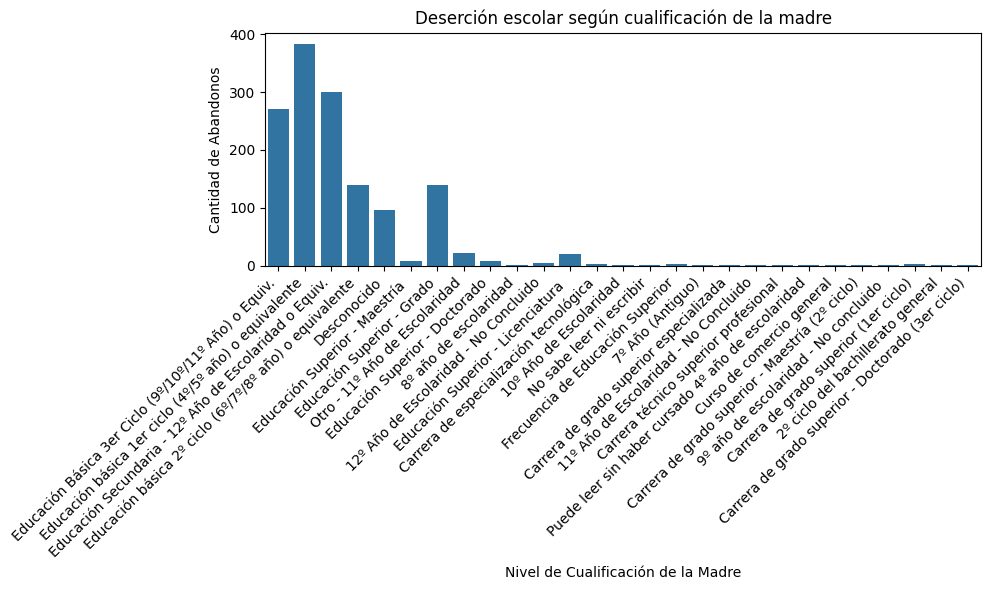

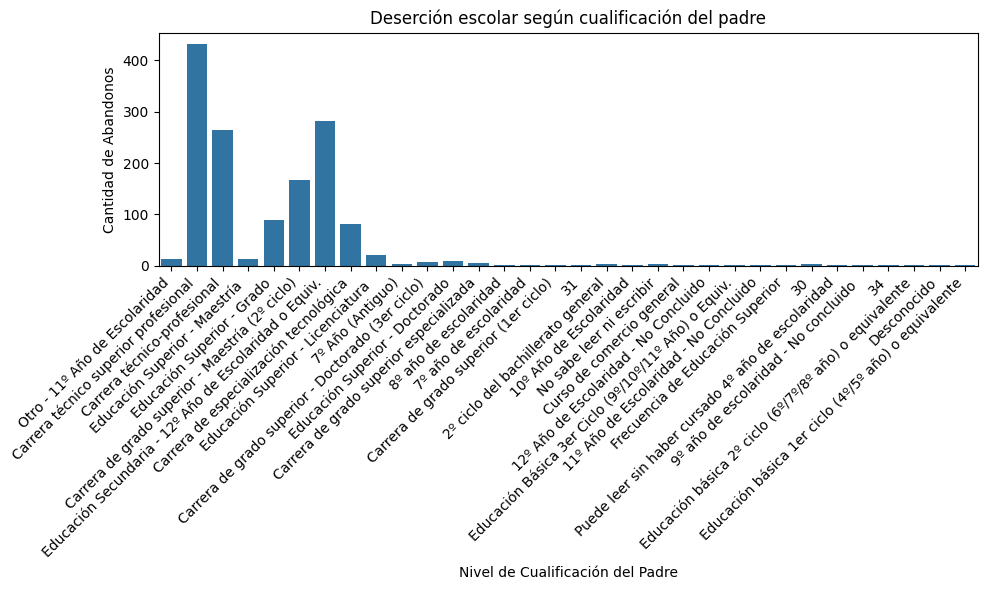

Tabla de Contingencia - Cualificación de la Madre vs. Rendimiento:
Rendimiento                                         Dropout  Enrolled  \
Cualificación_de_la_madre                                               
10º Año de Escolaridad                                    1         0   
11º Año de Escolaridad - No Concluido                     2         0   
12º Año de Escolaridad - No Concluido                     5         0   
2º ciclo del bachillerato general                         1         0   
7º Año (Antiguo)                                          2         0   
7º año de escolaridad                                     0         0   
8º año de escolaridad                                     1         0   
9º año de escolaridad - No concluido                      1         0   
Carrera de especialización tecnológica                    4         2   
Carrera de grado superior (1er ciclo)                     3         1   
Carrera de grado superior - Doctorado (3er ciclo)        

In [20]:
# Pregunta 3 ¿Qué relación existe entre la cualificación de los padres y la deserción escolar?

# --- Visualización de la cualificación de los padres y deserción escolar ---
# Gráfico de barras para la cualificación de la madre y abandonos
plt.figure(figsize=(10, 6))
sns.countplot(data=dropouts, x='Cualificación_de_la_madre')
plt.title('Deserción escolar según cualificación de la madre')
plt.xlabel('Nivel de Cualificación de la Madre')
plt.ylabel('Cantidad de Abandonos')
plt.xticks(rotation=45, ha='right', fontsize=10 )
plt.tight_layout()
plt.show()

# Gráfico de barras para la cualificación del padre y abandonos
plt.figure(figsize=(10, 6))
sns.countplot(data=dropouts, x='Cualificación_del_padre')
plt.title('Deserción escolar según cualificación del padre')
plt.xlabel('Nivel de Cualificación del Padre')
plt.ylabel('Cantidad de Abandonos')
plt.xticks(rotation=45, ha='right', fontsize=10 )
plt.tight_layout()
plt.show()

# --- Tabla de contingencia y análisis de chi-cuadrado ---
# Crear tabla de contingencia para cualificación de la madre
contingency_madre = pd.crosstab(df['Cualificación_de_la_madre'], df['Rendimiento'])
print("Tabla de Contingencia - Cualificación de la Madre vs. Rendimiento:")
print(contingency_madre)

# Test de chi2 para cualificación de la madre y deserción escolar
chi2, p, dof, expected = chi2_contingency(contingency_madre)
print(f"\nResultados Chi-Cuadrado (Madre): Chi2 = {chi2}, p-value = {p}")
if p < 0.05:
    print("Existe una relación significativa entre la cualificación de la madre y la deserción escolar.")
else:
    print("No hay una relación significativa entre la cualificación de la madre y la deserción escolar.")

# Crear tabla de contingencia para cualificación del padre
contingency_padre = pd.crosstab(df['Cualificación_del_padre'], df['Rendimiento'])
print("\nTabla de Contingencia - Cualificación del Padre vs. Rendimiento:")
print(contingency_padre)

# Test de chi2 para cualificación del padre y deserción escolar
chi2, p, dof, expected = chi2_contingency(contingency_padre)
print(f"\nResultados Chi-Cuadrado (Padre): Chi2 = {chi2}, p-value = {p}")

if p < 0.05:
    print("Existe una relación significativa entre la cualificación del padre y la deserción escolar.")
else:
    print("No hay una relación significativa entre la cualificación del padre y la deserción escolar.")



In [21]:
#Pregunta 4 ¿Hay diferencias notables en las tasas de deserción entre estudiantes de diferentes géneros?

# Filtrar los alumnos que han abandonado
dropouts = df[df['Rendimiento'] == 'Dropout']

# Contar los abandonos por género
abandonos_por_genero = dropouts['Género'].value_counts()

# Mostrar los resultados
abandonos_por_genero

,count
Género,
Femenino,720
Masculino,701


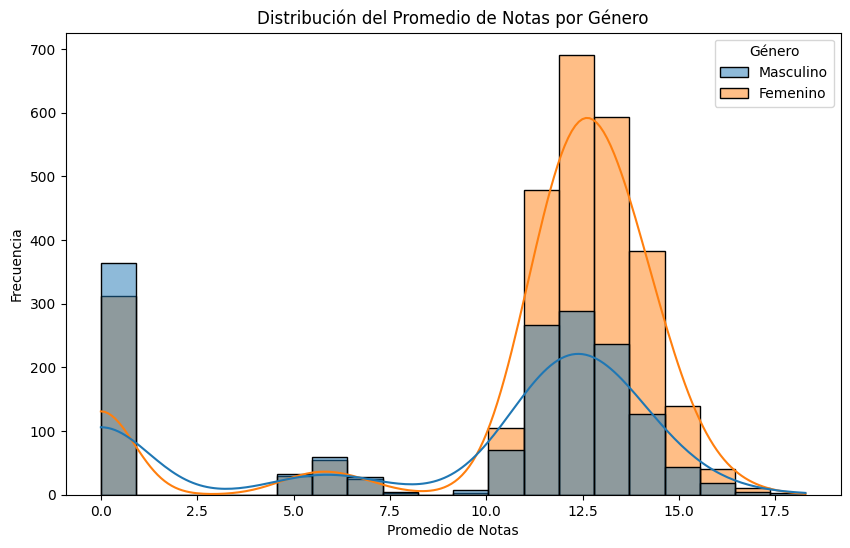

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos
# Asegúrate de cambiar la ruta del archivo a la ubicación correcta en tu entorno
data = df=pd.read_csv('Final.csv')
# Crear una columna de promedio de notas
data['Promedio_notas'] = data[['Nota_primer_semestre', 'Nota_segundo_semestre']].mean(axis=1)

# Generar la gráfica de distribución del promedio de notas por género
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Promedio_notas', hue='Género', kde=True, bins=20)
plt.title('Distribución del Promedio de Notas por Género')
plt.xlabel('Promedio de Notas')
plt.ylabel('Frecuencia')
plt.show()

In [25]:
# Pregunta 5 ¿Qué relación existe entre el número de deudas financieras de los estudiantes y su probabilidad de deserción?
dropouts = df[df['Rendimiento'] == 'Dropout']
